<a href="https://colab.research.google.com/github/Natalie-Pang/House-Price-Prediction-and-Outlier-Detection/blob/main/outlier_detection_%26__imputation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Outlier Detection

In [ ]:
import random
import pandas as pd
import numpy as np
import seaborn as sns

In [ ]:
houses = pd.read_csv('https://raw.githubusercontent.com/PaoloMissier/CSC3831-2021-22/main/IMPUTATION/TARGET-DATASETS/ORIGINAL/houses.csv', header=0)

In [ ]:
## distribution of each numeric colum

In [ ]:
houses.columns

Index(['median_house_value', 'median_income', 'housing_median_age',
       'total_rooms', 'total_bedrooms', 'population', 'households', 'latitude',
       'longitude'],
      dtype='object')

### plotting utility

In [ ]:
## plotting utility

import matplotlib.pyplot as plt
import numpy as np
from math import ceil

##
## type= {boxplot, kdeplot}
##
def plot_distributions(data, columns, type='boxplot', title=None):

    # print("plotting columns {c}".format(c=list(columns)))

    if type not in {'boxplot', 'dkeplot'}:
        print("type= {boxplot, dkeplot} only are supported")
        return

    ## grid size depends on number of columns
    ## max 4 columns in the grid
    maxCols  = 4

    if len(columns) < 4:
        numCols = len(columns)
    else:
        numCols = maxCols
    numRows = ceil(len(columns) / 4)

    # print("grid is {0}x{1}".format(numRows, numCols))

    fig, axs = plt.subplots(numRows, numCols)
    fig.suptitle(title)
    fig.set_figwidth(5*numCols)
    fig.set_figheight(3*numCols)
    fig.tight_layout(pad=5.0)

    # print(axs)

#         handle special axes
    if numRows == 1 and numCols == 1:
        c = columns[0]
        # axes is a scalar
        if type == 'boxplot':
            sns.boxplot(data=data, x=c, ax=axs)
        else:
            sns.kdeplot(data=data, x=c, ax=axs)
        axs.set_title(c)

    elif numRows == 1:
        i = 0
        # axes is a 1D array
        for c in columns:
#         print("column {c}".format(c=c))
            if type == 'boxplot':
                sns.boxplot(data=data, x=c, ax=axs[i])
            else:
                sns.kdeplot(data=data, x=c, ax=axs[i])
            axs[i].set_title(c)
            i = i+1

    else:
    # general case of a 2D grid
        i=j=0
        for c in columns:
            # print("column {c}".format(c=c))
            if type == 'boxplot':
                # print("plotting on axes [{0},{1}]".format(i,j))
                sns.boxplot(data=data, x=c, ax=axs[i,j])
            else:
                sns.kdeplot(data=data, x=c, ax=axs[i,j])

            axs[i,j].set_title(c)
            j = j+1
            if j == 4:
                i = i+1
                j= 0


### Descriptive analytics: start by looking at raw statistics for the features in this dataset. what sort of story are they telling?

feel free to use the plot utility defined above

In [ ]:
# Printing the summary of the dataset
houses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   median_house_value  20640 non-null  float64
 1   median_income       20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20640 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   latitude            20640 non-null  float64
 8   longitude           20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [ ]:
# Printing the summary statistics for numerical columns
houses.describe()

,median_house_value,median_income,housing_median_age,total_rooms,total_bedrooms,population,households,latitude,longitude
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,206855.816909,3.870671,28.639486,2635.763081,537.898014,1425.476744,499.539680,35.631861,-119.569704
std,115395.615874,1.899822,12.585558,2181.615252,421.247906,1132.462122,382.329753,2.135952,2.003532
min,14999.000000,0.499900,1.000000,2.000000,1.000000,3.000000,1.000000,32.540000,-124.350000
25%,119600.000000,2.563400,18.000000,1447.750000,295.000000,787.000000,280.000000,33.930000,-121.800000
50%,179700.000000,3.534800,29.000000,2127.000000,435.000000,1166.000000,409.000000,34.260000,-118.490000
75%,264725.000000,4.743250,37.000000,3148.000000,647.000000,1725.000000,605.000000,37.710000,-118.010000
max,500001.000000,15.000100,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,41.950000,-114.310000


In [ ]:
# See if there is missing value in each column
print("Total number of null value in the dataset: \n{}".format(houses.isnull().sum()))

Total number of null value in the dataset: 
median_house_value    0
median_income         0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
latitude              0
longitude             0
dtype: int64


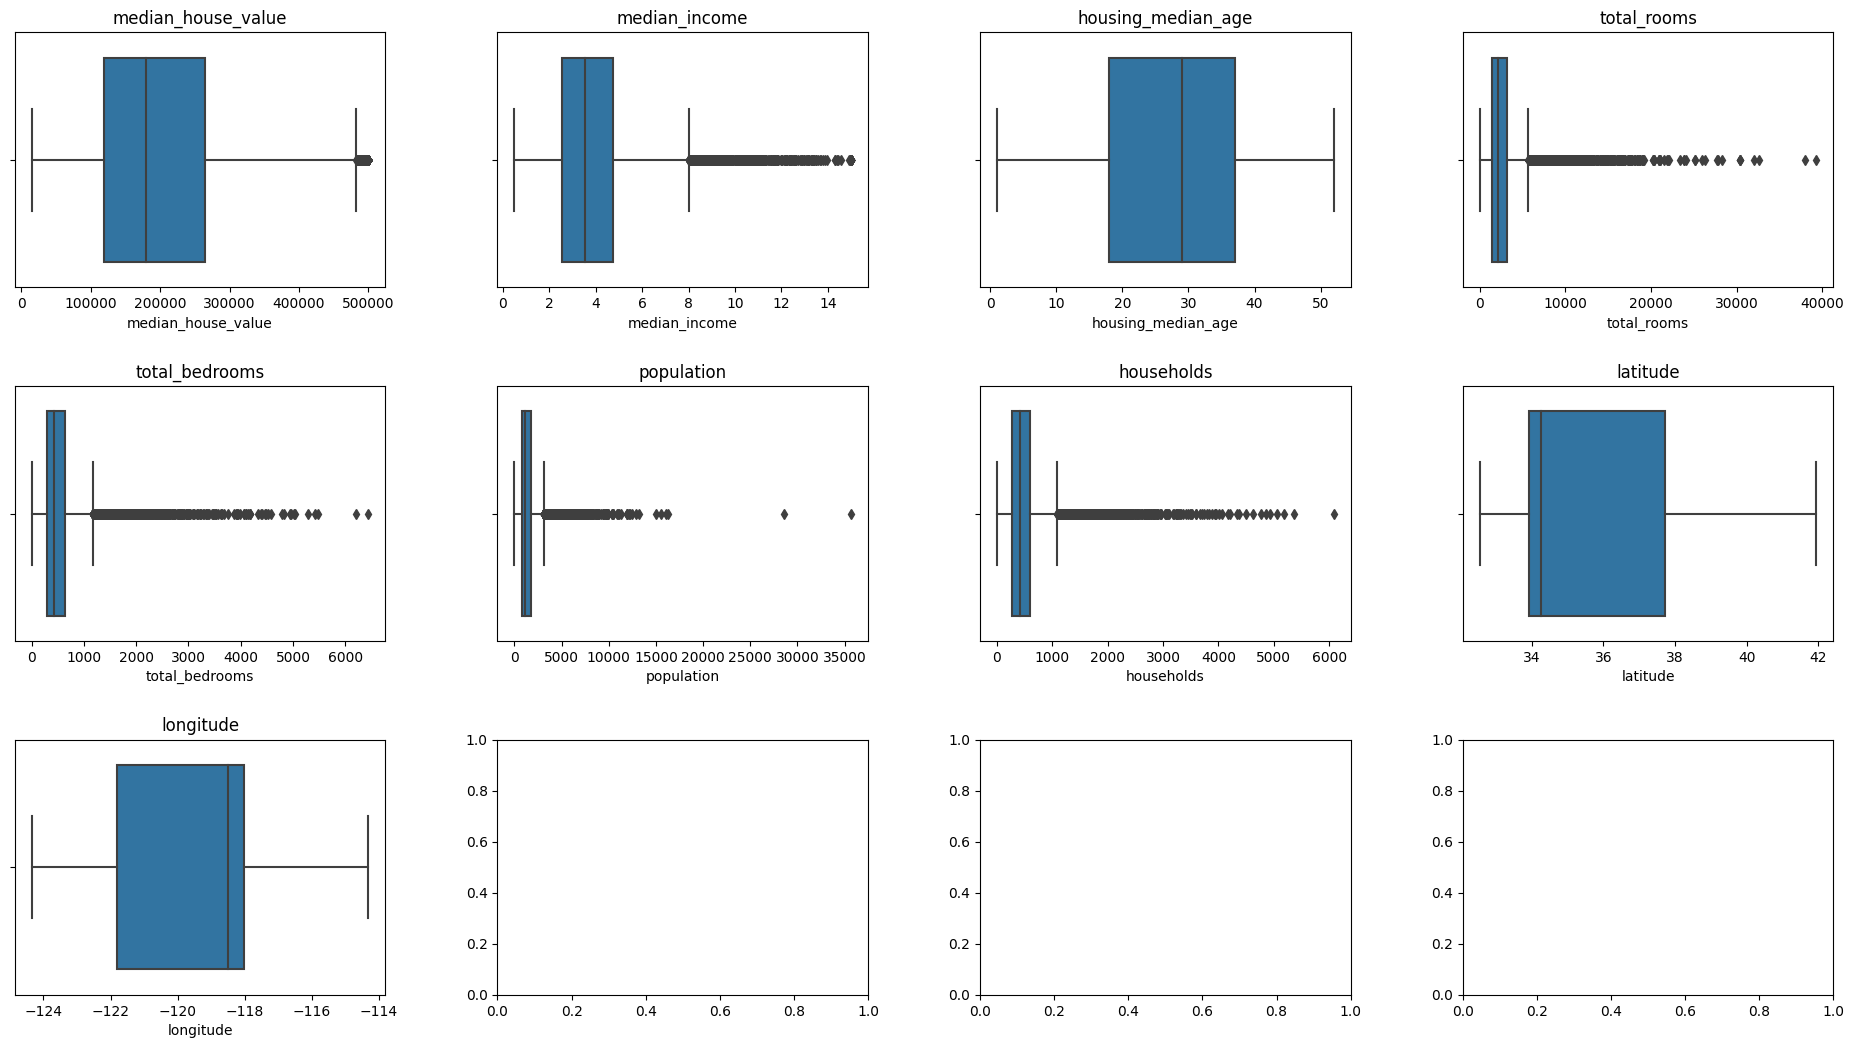

In [ ]:
# Plot box and whisker graph
plot_distributions(houses, houses.columns)

**1. Data Understanding:**<br>
A few functions are applied to perform ad hoc Exploratory Data Analysis (EDA) to have an initial analysis of the dataset provided. According to the statistic provided by houses.info(), There are 9 columns in total that represent median_house_value, median_income, housing_median_age, total_rooms, total_bedrooms, population, households, latitude, and longitude. There are total of 20640 rows. The data type of all columns are float64. Information such as mean, standard deviation, and percentiles are provided by houses.describe() function. For example, for median_income, it has mean of 3.870671, standard deviation of 1.899822, maximum of 15.000100, minimum of 0.499900, 25th Percentile (Q1) of2.563400, 50th Percentile (Q2) of 3.534800, and 75th Percentile (Q3) of 4.743250.
The houses.isnull().sum() function suggests that there is no null value in any columns of the dataset. Box and whisker plot (box plot) of each columns are displayed where the minimum, maximum, first quartile, third quartile, and median are visually displayed. It is noticable that there are outliers displayed as grey point in median_house_value, median_income, total_rooms, total_bedrooms, population, and households box plot tables. It is essential to remove outliers to improve model performance.

### feature normalisation

Some of the features need to be normalised before any conclusion can be drawn

In [ ]:
# Finding the range of each columns
for column in houses.columns:
  column_range = houses[column].max() - houses[column].min()
  print(f"Range for '{column}': {column_range}")

Range for 'median_house_value': 485002.0
Range for 'median_income': 14.5002
Range for 'housing_median_age': 51.0
Range for 'total_rooms': 39318.0
Range for 'total_bedrooms': 6444.0
Range for 'population': 35679.0
Range for 'households': 6081.0
Range for 'latitude': 9.410000000000004
Range for 'longitude': 10.039999999999992


In [ ]:
houses_normalised = (houses - houses.mean()) / houses.std()
houses_normalised.describe()

,median_house_value,median_income,housing_median_age,total_rooms,total_bedrooms,population,households,latitude,longitude
count,2.064000e+04,2.064000e+04,2.064000e+04,2.064000e+04,2.064000e+04,2.064000e+04,2.064000e+04,2.064000e+04,2.064000e+04
mean,-1.211778e-16,6.609700e-17,3.855658e-17,2.444212e-17,2.754042e-17,-1.927829e-17,6.334296e-17,-9.914550e-16,-8.570577e-15
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.662601e+00,-1.774256e+00,-2.196127e+00,-1.207254e+00,-1.274542e+00,-1.256092e+00,-1.303952e+00,-1.447533e+00,-2.385935e+00
25%,-7.561450e-01,-6.881019e-01,-8.453727e-01,-5.445566e-01,-5.766154e-01,-5.637952e-01,-5.742155e-01,-7.967694e-01,-1.113182e+00
50%,-2.353280e-01,-1.767908e-01,2.864502e-02,-2.332048e-01,-2.442695e-01,-2.291262e-01,-2.368104e-01,-6.422715e-01,5.389006e-01
75%,5.014851e-01,4.592952e-01,6.642943e-01,2.347971e-01,2.589971e-01,2.644885e-01,2.758360e-01,9.729330e-01,7.784775e-01
max,2.540349e+00,5.858144e+00,1.856137e+00,1.681517e+01,1.402286e+01,3.024960e+01,1.460117e+01,2.957996e+00,2.625216e+00


In [ ]:
houses_normalised.head()

,median_house_value,median_income,housing_median_age,total_rooms,total_bedrooms,population,households,latitude,longitude
0,2.129580,2.344709,0.982119,-0.804800,-0.970683,-0.974405,-0.977009,1.052523,-1.327803
1,1.314124,2.332181,-0.607004,2.045841,1.348617,0.861418,1.669921,1.043159,-1.322812
2,1.258663,1.782656,1.856137,-0.535733,-0.825875,-0.820757,-0.843616,1.038478,-1.332794
3,1.165072,0.932945,1.856137,-0.624199,-0.719049,-0.766010,-0.733764,1.038478,-1.337785
4,1.172871,-0.012881,1.856137,-0.462393,-0.612224,-0.759828,-0.629142,1.038478,-1.337785


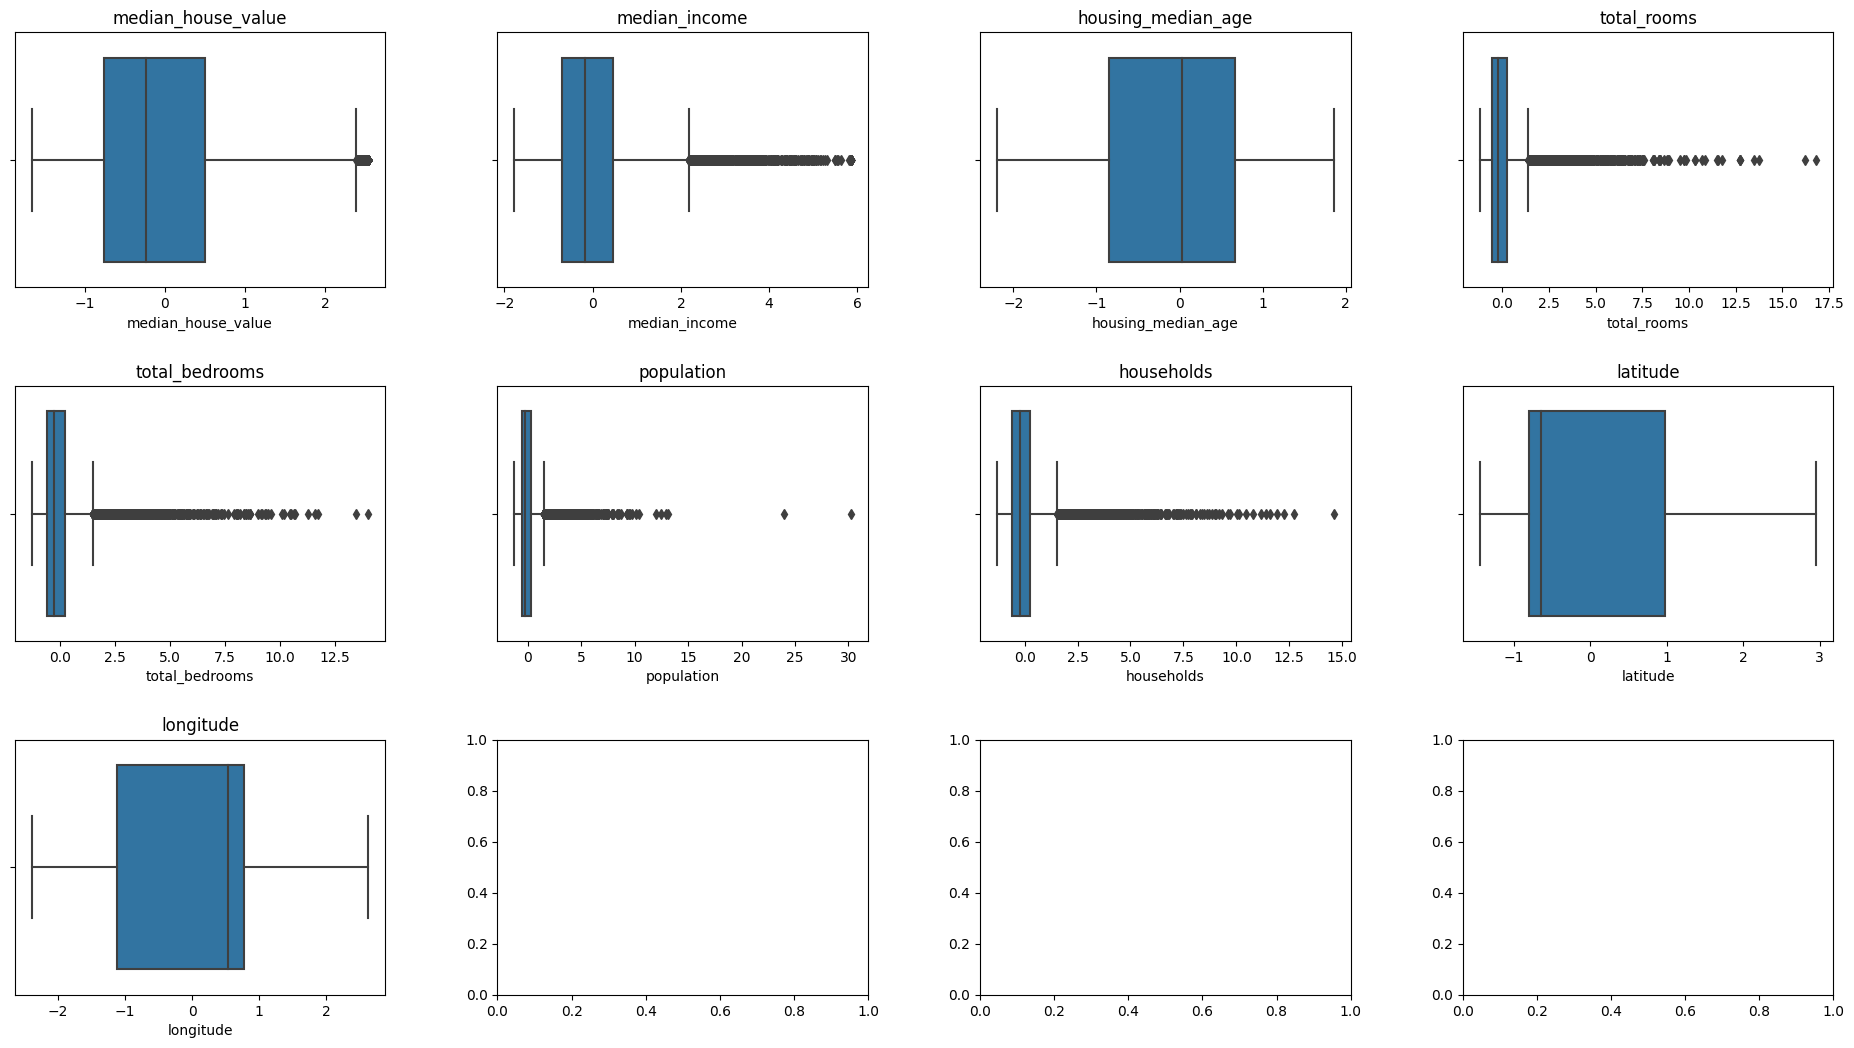

In [ ]:
plot_distributions(houses_normalised, houses_normalised.columns)

**2. Normalisation**<br>
After performing ad hoc Exploratory Data Analysis (EDA) in the first section, it is noticable that some of the columns have large ranges where the distance between the maximum and minimum is large. By substracting the maximum and minimum value in each column, the range of the column can be found. For example, the range in median_house_value column is 485002.0. The columns may contain extreme values that could be outliers. To ensure better performance to analyse the data, normalisation is taken place. Z-score standardization is applied to transform a dataset into a standard normal distribution with a mean of 0 and a standard deviation of 1. For value in each column, substract the value with the mean, then divide it by its standard deviation (houses - houses.mean()) / houses.std(). After normalising the data, the data is scaled so that the variance is consistent.

### record identification

based on analysis of the normalised features, try and pinpoint specific records that may be outliers, and explain why

In [ ]:
# Finding the total number and indexes of outliers in the dataset
outlier_indices = []
for column in houses_normalised.columns:
    Q1 = houses_normalised[column].quantile(0.25)
    Q3 = houses_normalised[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_lim = Q1 - 1.5 * IQR
    upper_lim = Q3 + 1.5 * IQR
    out_low = houses_normalised[column] < lower_lim
    out_high = houses_normalised[column] > upper_lim
    outliers = houses_normalised[column][(out_low | out_high)]
    outlier_indices.extend(list(outliers.index))
print(f'Total number of outliers in the dataset: {len(list(set(outlier_indices)))}')
print("Indices of outliers:")
print(sorted(list(set(outlier_indices))))

Total number of outliers in the dataset: 3019
Indices of outliers:
[0, 1, 89, 95, 96, 98, 100, 101, 104, 112, 116, 131, 134, 135, 137, 140, 154, 155, 185, 283, 391, 407, 409, 459, 460, 485, 489, 493, 494, 508, 509, 510, 511, 512, 513, 514, 516, 517, 536, 538, 568, 570, 571, 573, 574, 576, 592, 605, 654, 706, 707, 709, 761, 780, 794, 799, 821, 839, 850, 864, 865, 866, 867, 868, 869, 871, 875, 881, 883, 885, 886, 887, 888, 889, 895, 910, 919, 922, 923, 924, 928, 936, 945, 946, 952, 953, 955, 957, 964, 972, 977, 985, 986, 988, 989, 995, 996, 1004, 1010, 1015, 1021, 1039, 1053, 1054, 1055, 1056, 1058, 1059, 1060, 1074, 1076, 1077, 1086, 1214, 1220, 1244, 1260, 1261, 1262, 1277, 1304, 1330, 1350, 1354, 1373, 1380, 1395, 1399, 1405, 1407, 1415, 1469, 1477, 1500, 1503, 1507, 1508, 1511, 1513, 1514, 1515, 1517, 1524, 1538, 1541, 1543, 1547, 1554, 1556, 1558, 1560, 1561, 1562, 1563, 1564, 1566, 1568, 1574, 1575, 1577, 1578, 1580, 1581, 1582, 1583, 1584, 1585, 1586, 1587, 1588, 1589, 1590, 1591,

In [ ]:
# Function to find outliers in each column and locate their indexes
def search_outliers(column_name):
  Q1 = houses_normalised[column_name].quantile(0.25)
  Q3 = houses_normalised[column_name].quantile(0.75)
  IQR = Q3 - Q1
  lower_lim = Q1 - 1.5*IQR
  upper_lim = Q3 + 1.5*IQR
  out_low = houses_normalised[column_name] < lower_lim
  out_high = houses_normalised[column_name] > upper_lim
  outliers = houses_normalised[column_name][(out_low | out_high)]
  outlier_indices_list = list(outliers.index)
  outlier_value_list = list(outliers)
  print(f'Value smaller than lower-bound ({lower_lim}) and larger than upper-bound ({upper_lim}) are outliers')
  print(f'Total number of outliers in {column_name}: {len(outliers)}')
  print(f"Indices of outliers in {column_name}:")
  print(outlier_indices_list)
  print(f'Value of the outliers in {column_name}:')
  print(outlier_value_list)

Value smaller than lower-bound (-2.642590141732832) and larger than upper-bound (2.387930260634652) are outliers
Total number of outliers in median_house_value: 1071
Indices of outliers in median_house_value:
[89, 140, 459, 489, 493, 494, 509, 510, 511, 512, 514, 517, 923, 955, 1574, 1581, 1582, 1583, 1585, 1586, 1591, 1593, 1617, 1621, 1636, 1637, 1638, 1639, 1644, 1645, 1646, 1647, 1914, 3486, 3533, 3542, 3556, 3557, 3571, 3572, 3801, 3858, 3953, 4009, 4010, 4014, 4018, 4033, 4034, 4038, 4039, 4040, 4042, 4044, 4045, 4046, 4047, 4048, 4049, 4050, 4056, 4067, 4068, 4069, 4070, 4071, 4072, 4073, 4074, 4075, 4076, 4077, 4078, 4106, 4108, 4109, 4110, 4111, 4114, 4115, 4116, 4218, 4220, 4224, 4229, 4233, 4234, 4236, 4237, 4245, 4246, 4247, 4248, 4249, 4252, 4259, 4319, 4327, 4345, 4346, 4347, 4348, 4350, 4351, 4352, 4353, 4354, 4355, 4360, 4559, 4603, 4604, 4605, 4606, 4607, 4622, 4624, 4626, 4630, 4644, 4674, 4675, 4677, 4678, 4679, 4680, 4681, 4688, 4693, 4694, 4698, 4700, 4702, 4703, 4

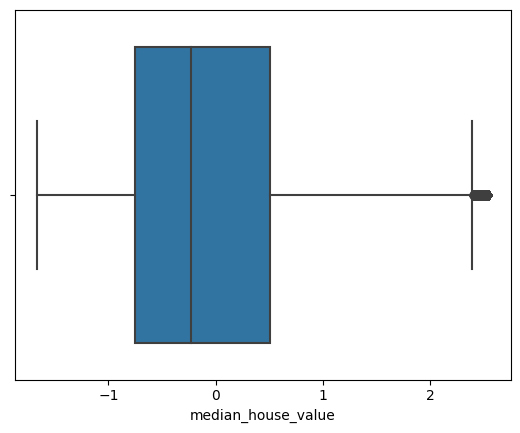

In [ ]:
# Finding and locating outliers in 'median_house_value'
ax = sns.boxplot(data=houses_normalised, x='median_house_value')
search_outliers('median_house_value')

Value smaller than lower-bound (-2.4091976419014887) and larger than upper-bound (2.180390906138888) are outliers
Total number of outliers in median_income: 681
Indices of outliers in median_income:
[0, 1, 131, 134, 135, 137, 154, 155, 407, 409, 494, 510, 511, 512, 513, 514, 516, 517, 888, 922, 923, 955, 977, 986, 996, 1541, 1554, 1556, 1561, 1563, 1564, 1566, 1574, 1578, 1580, 1582, 1583, 1585, 1586, 1587, 1589, 1590, 1591, 1593, 1594, 1599, 1602, 1617, 1621, 1626, 1628, 1629, 1636, 1637, 1638, 1639, 1644, 1645, 1646, 1647, 1653, 1654, 1655, 1659, 2213, 2214, 2215, 2226, 2227, 2826, 2969, 2971, 3472, 3476, 3481, 3485, 3486, 3487, 3529, 3533, 3534, 3535, 3542, 3556, 3557, 3561, 3571, 3572, 3575, 3858, 3952, 3953, 4002, 4014, 4015, 4018, 4039, 4042, 4044, 4045, 4046, 4047, 4048, 4049, 4050, 4056, 4067, 4070, 4071, 4072, 4074, 4075, 4077, 4106, 4108, 4111, 4116, 4220, 4229, 4233, 4244, 4319, 4345, 4346, 4350, 4352, 4353, 4354, 4492, 4603, 4604, 4605, 4606, 4622, 4626, 4653, 4677, 4678, 5

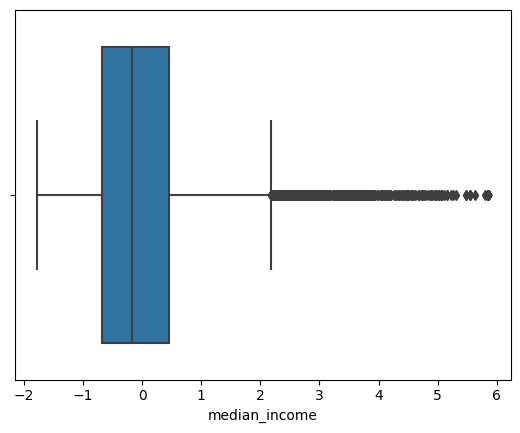

In [ ]:
# Finding and locating outliers in 'median_income'
ax = sns.boxplot(data=houses_normalised, x='median_income')
search_outliers('median_income')

Value smaller than lower-bound (-3.1098730497600546) and larger than upper-bound (2.9287946312699678) are outliers
Total number of outliers in housing_median_age: 0
Indices of outliers in housing_median_age:
[]
Value of the outliers in housing_median_age:
[]


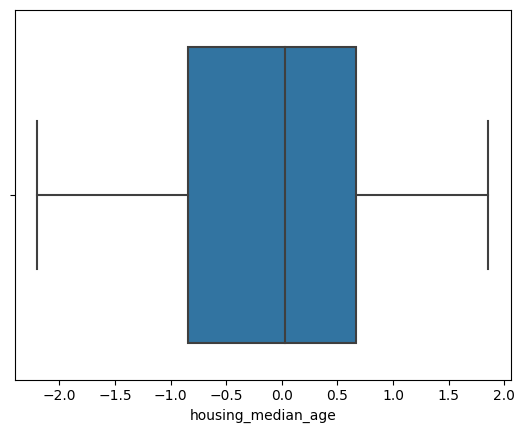

In [ ]:
# Finding and locating outliers in 'housing_median_age'
ax = sns.boxplot(data=houses_normalised, x='housing_median_age')
search_outliers('housing_median_age')

Value smaller than lower-bound (-1.713587250860614) and larger than upper-bound (1.4038276989412684) are outliers
Total number of outliers in total_rooms: 1287
Indices of outliers in total_rooms:
[1, 101, 104, 185, 283, 508, 568, 570, 571, 573, 576, 592, 605, 654, 706, 707, 780, 799, 821, 850, 864, 865, 866, 867, 868, 869, 871, 875, 881, 883, 887, 889, 910, 919, 922, 924, 928, 936, 945, 946, 952, 953, 957, 964, 972, 985, 988, 989, 995, 1004, 1010, 1015, 1021, 1053, 1054, 1055, 1058, 1059, 1060, 1074, 1076, 1086, 1214, 1220, 1244, 1260, 1261, 1262, 1277, 1304, 1354, 1373, 1380, 1395, 1399, 1405, 1415, 1469, 1477, 1500, 1507, 1508, 1511, 1514, 1517, 1524, 1538, 1541, 1543, 1547, 1556, 1558, 1560, 1562, 1568, 1574, 1575, 1577, 1582, 1584, 1585, 1588, 1589, 1590, 1593, 1603, 1607, 1608, 1622, 1623, 1636, 1640, 1642, 1645, 1668, 1678, 1697, 1700, 1705, 1710, 1752, 1889, 1930, 1932, 1933, 1934, 1970, 1982, 1984, 2025, 2115, 2119, 2122, 2171, 2236, 2240, 2241, 2255, 2267, 2284, 2292, 2294, 22

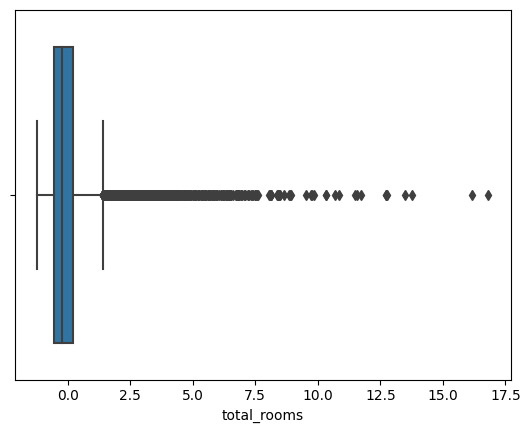

In [ ]:
# Finding and locating outliers in 'total_rooms'
ax = sns.boxplot(data=houses_normalised, x='total_rooms')
search_outliers('total_rooms')

Value smaller than lower-bound (-1.8300340552196404) and larger than upper-bound (1.5124157947033607) are outliers
Total number of outliers in total_bedrooms: 1282
Indices of outliers in total_bedrooms:
[95, 96, 98, 100, 101, 104, 112, 116, 185, 283, 391, 485, 508, 538, 568, 570, 571, 573, 574, 576, 605, 654, 706, 707, 709, 761, 780, 794, 799, 821, 850, 864, 865, 867, 868, 869, 871, 875, 881, 883, 885, 886, 887, 889, 895, 910, 922, 924, 928, 945, 946, 964, 972, 985, 988, 989, 995, 1010, 1015, 1021, 1053, 1055, 1056, 1058, 1059, 1060, 1074, 1076, 1077, 1086, 1214, 1220, 1244, 1260, 1261, 1277, 1304, 1330, 1373, 1380, 1395, 1399, 1405, 1407, 1477, 1503, 1507, 1508, 1511, 1513, 1514, 1515, 1517, 1524, 1558, 1560, 1562, 1575, 1588, 1590, 1607, 1608, 1622, 1623, 1642, 1645, 1678, 1700, 1705, 1737, 1752, 1889, 1930, 1982, 2025, 2107, 2115, 2119, 2122, 2126, 2236, 2240, 2255, 2267, 2284, 2292, 2294, 2297, 2299, 2311, 2312, 2830, 2961, 2963, 2967, 2975, 2978, 2995, 2999, 3001, 3003, 3004, 3008

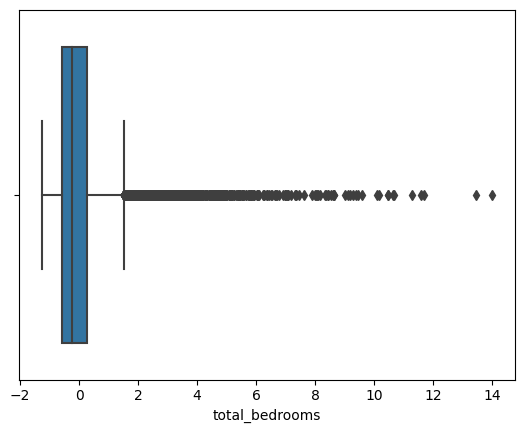

In [ ]:
# Finding and locating outliers in 'total_bedrooms'
ax = sns.boxplot(data=houses_normalised, x='total_bedrooms')
search_outliers('total_bedrooms')

Value smaller than lower-bound (-1.806220892401638) and larger than upper-bound (1.5069142031468004) are outliers
Total number of outliers in population: 1196
Indices of outliers in population:
[95, 185, 283, 460, 485, 536, 538, 570, 576, 706, 707, 780, 794, 799, 821, 839, 850, 864, 865, 866, 867, 868, 869, 871, 875, 881, 883, 886, 887, 889, 919, 922, 924, 928, 936, 945, 953, 964, 972, 985, 988, 995, 1004, 1010, 1015, 1021, 1039, 1053, 1055, 1058, 1059, 1060, 1074, 1076, 1086, 1220, 1244, 1260, 1261, 1262, 1277, 1304, 1350, 1354, 1373, 1380, 1399, 1477, 1508, 1511, 1517, 1524, 1558, 1560, 1568, 1575, 1588, 1590, 1623, 1640, 1642, 1645, 1678, 1697, 1700, 1705, 1710, 1752, 1862, 1930, 1982, 2007, 2025, 2031, 2094, 2107, 2115, 2119, 2122, 2171, 2255, 2267, 2294, 2297, 2311, 2312, 2425, 2756, 2829, 2830, 2961, 2963, 2967, 2975, 2978, 2979, 2995, 2999, 3001, 3003, 3004, 3006, 3008, 3036, 3047, 3061, 3134, 3147, 3149, 3167, 3168, 3177, 3364, 3378, 3387, 3388, 3411, 3412, 3413, 3419, 3440, 34

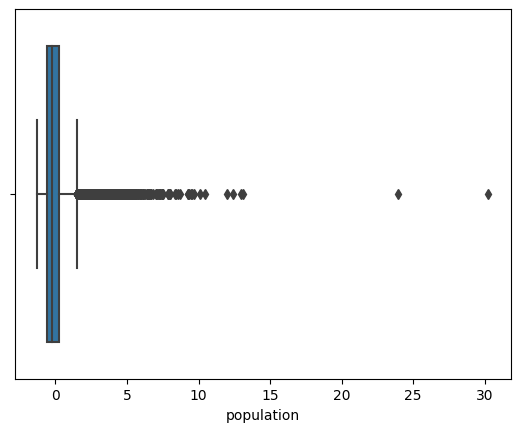

In [ ]:
# Finding and locating outliers in 'population'
ax = sns.boxplot(data=houses_normalised, x='population')
search_outliers('population')

Value smaller than lower-bound (-1.849292855175619) and larger than upper-bound (1.550913355227677) are outliers
Total number of outliers in households: 1220
Indices of outliers in households:
[1, 95, 96, 98, 100, 101, 104, 112, 116, 185, 283, 391, 485, 508, 538, 568, 570, 571, 573, 574, 576, 605, 654, 706, 707, 761, 780, 794, 799, 821, 850, 864, 865, 867, 868, 869, 871, 875, 881, 883, 885, 886, 887, 889, 895, 910, 922, 924, 928, 945, 946, 957, 964, 972, 985, 988, 989, 995, 1010, 1015, 1021, 1053, 1054, 1055, 1056, 1058, 1059, 1060, 1074, 1076, 1086, 1220, 1244, 1260, 1261, 1277, 1304, 1330, 1354, 1373, 1380, 1395, 1399, 1405, 1407, 1477, 1507, 1508, 1511, 1513, 1514, 1515, 1517, 1524, 1558, 1560, 1562, 1575, 1588, 1590, 1603, 1607, 1608, 1622, 1623, 1642, 1645, 1678, 1700, 1705, 1737, 1752, 1930, 1982, 1984, 2025, 2115, 2119, 2122, 2126, 2171, 2240, 2255, 2267, 2284, 2292, 2294, 2297, 2299, 2311, 2312, 2830, 2961, 2963, 2967, 2975, 2978, 2995, 2999, 3001, 3003, 3004, 3008, 3134, 3147,

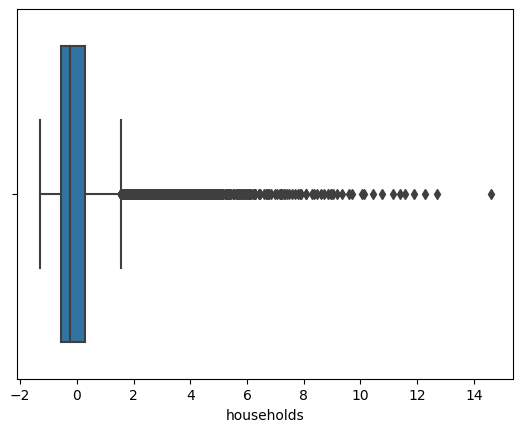

In [ ]:
# Finding and locating outliers in 'households'
ax = sns.boxplot(data=houses_normalised, x='households')
search_outliers('households')

Value smaller than lower-bound (-3.4513229053628947) and larger than upper-bound (3.6274865372073615) are outliers
Total number of outliers in latitude: 0
Indices of outliers in latitude:
[]
Value of the outliers in latitude:
[]


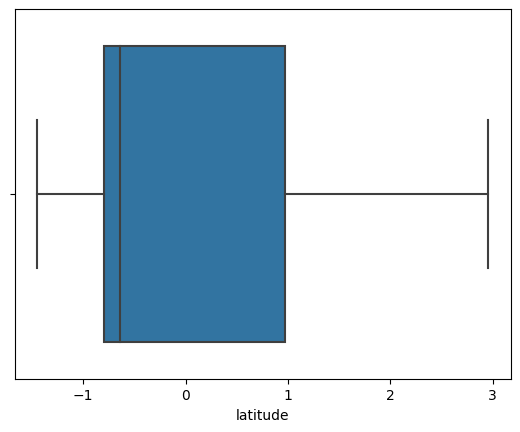

In [ ]:
# Finding and locating outliers in 'latitude'
ax = sns.boxplot(data=houses_normalised, x='latitude')
search_outliers('latitude')

Value smaller than lower-bound (-3.950671431744583) and larger than upper-bound (3.6159669309847833) are outliers
Total number of outliers in longitude: 0
Indices of outliers in longitude:
[]
Value of the outliers in longitude:
[]


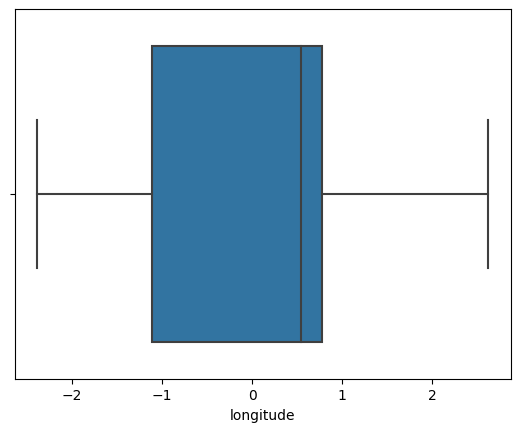

In [ ]:
# Finding and locating outliers in 'longitude'
ax = sns.boxplot(data=houses_normalised, x='longitude')
search_outliers('longitude')

**3. Non Algorithmic Outlier Detection**<br>
As mentioned above, the data in some of the columns has a large range, leading to outliers. A function named search_outliers() is created to apply the Interquartile Range (IQR) method to find outliers in each column of the dataset. Firstly, the first quartile (Q1) and thrid quartile (Q3) are caluculated. By substracting Q1 and Q3 we get the interquartile range (IQR). The lower and upper bound, whcih are used to define a range within which most of the data points are expected to lie, are calculated by Q1 - 1.5(IQR) and Q3 + 1.5(IQR) respectively. 1.5 is used as the threshold. The data with value smaller than the lower bound and value larger than the upper bound are identified as outliers. Since a box and whisker plot (box plot) uses the same IQR method to discover the outliers, it is used to visualise the outliers in each column.<br>
In the first box the total number of outliers, and the indexes of the outliers are printed out. For each box after that, the lower bound, upper bound, number of outliers, and the indexes of outliers are printed. A box and whisker plot (box plot) is also included for better visualisation to analysis the outliers.

From the result, there are total of 3019 outliers found using rge IQR method.

have you completely solved the problem? how do we know for sure?

we may have removed too much (FP) or too little (FN). Can you suggest empirical validation of your findings?

As mentioned above, some of the columns have large range which may contain extreme value that affect analysis performance. To improve the perfomance, Interquartile Range (IQR) method is applied to detect outliers. However, the IQR method only defines values within the interquartile range as inliners, where value that fall outside the interquartile range are determined as outliers. Extreme values may be neglected, leading to false negatives. Also, there may be valuable data points that are extreme value but are not necessarily outliers.

In [ ]:
corr1 = houses_normalised.median_house_value.corr(houses_normalised.total_rooms/houses_normalised.households)
corr2 = houses_normalised.median_house_value.corr(houses_normalised.total_bedrooms/houses_normalised.households)

print("correlations: median value to number of rooms: {0:.2}, median value to number of bedrooms: {1:.2}".format(corr1, corr2))

correlations: median value to number of rooms: 0.00034, median value to number of bedrooms: 0.0094


**Explanation**<br>
The above code has calculated and displayed correlations to gain insights into how the size of rooms in a house (total rooms and total bedrooms) is related to the median house value. The correlation of median value to number of rooms is 0.00034, while median value to number of bedrooms is 0.0094. Both correlations are relatively low which is close to zero, it suggests that the size of rooms may not be a strong determinant of house value. It may also suggest that unusual data points with extreme room sizes could be potential outliers

it appears that house value is not strongly correlated with size, so probably location is a more relevant factor

## next, try using LOF and / or KNN and see if the results align with your empirical analysis

In [ ]:
from sklearn.neighbors import LocalOutlierFactor
from sklearn.neighbors import NearestNeighbors
from scipy.stats import zscore

Total number of outliers: 234
Indexes of outliers:
[61, 89, 95, 457, 458, 459, 460, 1039, 1067, 1566, 1645, 1862, 1889, 1913, 1914, 1926, 1979, 2045, 2048, 2213, 2227, 2249, 2250, 2251, 2392, 2396, 2587, 2685, 2687, 2693, 2737, 2742, 2743, 2747, 2760, 2774, 2780, 2790, 2792, 2794, 2795, 2799, 2826, 2827, 2907, 2969, 3086, 3313, 3349, 3350, 3353, 3364, 4131, 4263, 4264, 4289, 4492, 4548, 4556, 4557, 4559, 4588, 4616, 4634, 4636, 4702, 4861, 4875, 5070, 5299, 5531, 5766, 5887, 5985, 5986, 6057, 6226, 6639, 7164, 7165, 7848, 8219, 8343, 9075, 9081, 9172, 9188, 9193, 9339, 9675, 9676, 9697, 9788, 9804, 9827, 9880, 9939, 10076, 10309, 10764, 10904, 10957, 11089, 11716, 11728, 11828, 11833, 11834, 11883, 11897, 11902, 11912, 12368, 12369, 12371, 12374, 12375, 12376, 12386, 12394, 12395, 12430, 12443, 12447, 12454, 12458, 12481, 12547, 12948, 13015, 13034, 13139, 13297, 13366, 13473, 13561, 13730, 13759, 13787, 13788, 13889, 13890, 13912, 13919, 13925, 13927, 13928, 13929, 13935, 13937, 13942

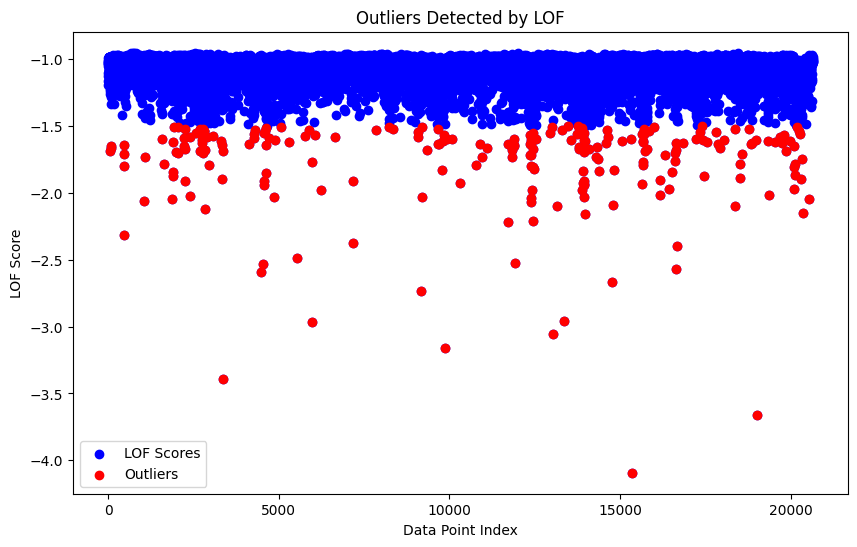

In [ ]:
# Applying Local Outlier Factor (LOF) method to detect outliers
lof = LocalOutlierFactor(n_neighbors=20)
lof.fit(houses_normalised)
outlier_scores = lof.negative_outlier_factor_
threshold= -1.5
outliers_indices = [i for i, score in enumerate(outlier_scores) if score < threshold]
print(f'Total number of outliers: {len(outliers_indices)}')
print('Indexes of outliers:')
print(outliers_indices)

# Ploting scatter plot to display outliers
plt.figure(figsize=(10, 6))
plt.scatter(houses_normalised.index, outlier_scores, label='LOF Scores', c='b')
outlier_indices = np.array(outliers_indices)
plt.scatter(houses_normalised.index[outlier_indices], outlier_scores[outlier_indices], c='r', label='Outliers')
plt.xlabel('Data Point Index')
plt.ylabel('LOF Score')
plt.legend()
plt.title('Outliers Detected by LOF')
plt.show()

4. Algorithmic Outlier Detection<br>
Local Outlier Factor (LOF), which is an outlier detection algorithm that computes the local density deviation of a given data point with respect to its neighbors, is applied to check if the results align with my empirical analysis. The threshold is set to -1.5. From the output, there are total of 234 outliers detected from the normalised data, which is less than the number detected from IQR method (3019). A scatter plot is also displayed to show the inliners and outliers.

## Your overall conclusions here

Some of the columns in the dataset has large range, and this may affect performance of analysis. Z-score standardisation is applied to scale the data to between -2 and 2. After normalising the data with z-score standardisation, Interquartile Range (IQR) method is applied to detect outliers in the dataset.However using Interquartile Range (IQR) method may not be a good practice to detect outliers as the dataset has large range where extreme values exist. There may be false positive or false negative. After applying Local Outlier Factor (LOF) outlier detection algorithm, which computes the local density deviation of a given data point with respect to its neighbors, it is noticable that there are less outliers found. There are 3019-234 = 2785 less outliers found with LOF algorithm compared with IQR method. The result indicates that LOF has better performance for the accuracy of outlier detection because LOF focuses on identifying data points that are significantly different from their local neighborhoods, making it a more suitable method for datasets with varying densities and extreme values. It provides more accurate results with less false positives, making it a better tool for identifying anomalies in the data.

# Imputation

In [ ]:
import random
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.impute import KNNImputer
import missingno as msno

In [ ]:
houses = pd.read_csv('https://raw.githubusercontent.com/PaoloMissier/CSC3831-2021-22/main/IMPUTATION/TARGET-DATASETS/CORRUPTED/HOUSES/houses_0.5_MAR.csv', header=0)
houses = houses.drop('Unnamed: 0', axis=1)

## 1. Data Understanding

In [ ]:
# distribution of each numeric colum
houses.columns

Index(['median_house_value', 'median_income', 'housing_median_age',
       'total_rooms', 'total_bedrooms', 'population', 'households', 'latitude',
       'longitude'],
      dtype='object')

In [ ]:
# Printing the summary of the dataset
houses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   median_house_value  20640 non-null  float64
 1   median_income       10320 non-null  float64
 2   housing_median_age  10320 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20640 non-null  float64
 5   population          10320 non-null  float64
 6   households          20640 non-null  float64
 7   latitude            20640 non-null  float64
 8   longitude           20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [ ]:
# Printing the summary statistics for numerical columns
houses.describe()

,median_house_value,median_income,housing_median_age,total_rooms,total_bedrooms,population,households,latitude,longitude
count,20640.000000,10320.000000,10320.000000,20640.000000,20640.000000,10320.000000,20640.000000,20640.000000,20640.000000
mean,206855.816909,3.940372,27.649128,2635.763081,537.898014,1352.802229,499.539680,35.631861,-119.569704
std,115395.615874,1.915848,13.294325,2181.615252,421.247906,1074.226167,382.329753,2.135952,2.003532
min,14999.000000,0.499900,1.000000,2.000000,1.000000,5.000000,1.000000,32.540000,-124.350000
25%,119600.000000,2.603300,17.000000,1447.750000,295.000000,748.000000,280.000000,33.930000,-121.800000
50%,179700.000000,3.601950,26.000000,2127.000000,435.000000,1127.000000,409.000000,34.260000,-118.490000
75%,264725.000000,4.835600,37.000000,3148.000000,647.000000,1654.000000,605.000000,37.710000,-118.010000
max,500001.000000,15.000100,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,41.950000,-114.310000


In [ ]:
# See if there is missing value in each column
print("Total number of null value in the dataset: \n{}".format(houses.isnull().sum()))
# count the % of missing values in median_income, housing_median_age, and population
print("missing values in median_income: {0:.3}%".format(houses['median_income'].isnull().sum()/len(houses)*100))
print("missing values in housing_median_age: {0:.3}%".format(houses['housing_median_age'].isnull().sum()/len(houses)*100))
print("missing values in population: {0:.3}%".format(houses['population'].isnull().sum()/len(houses)*100))

Total number of null value in the dataset: 
median_house_value        0
median_income         10320
housing_median_age    10320
total_rooms               0
total_bedrooms            0
population            10320
households                0
latitude                  0
longitude                 0
dtype: int64
missing values in median_income: 50.0%
missing values in housing_median_age: 50.0%
missing values in population: 50.0%


<Axes: >

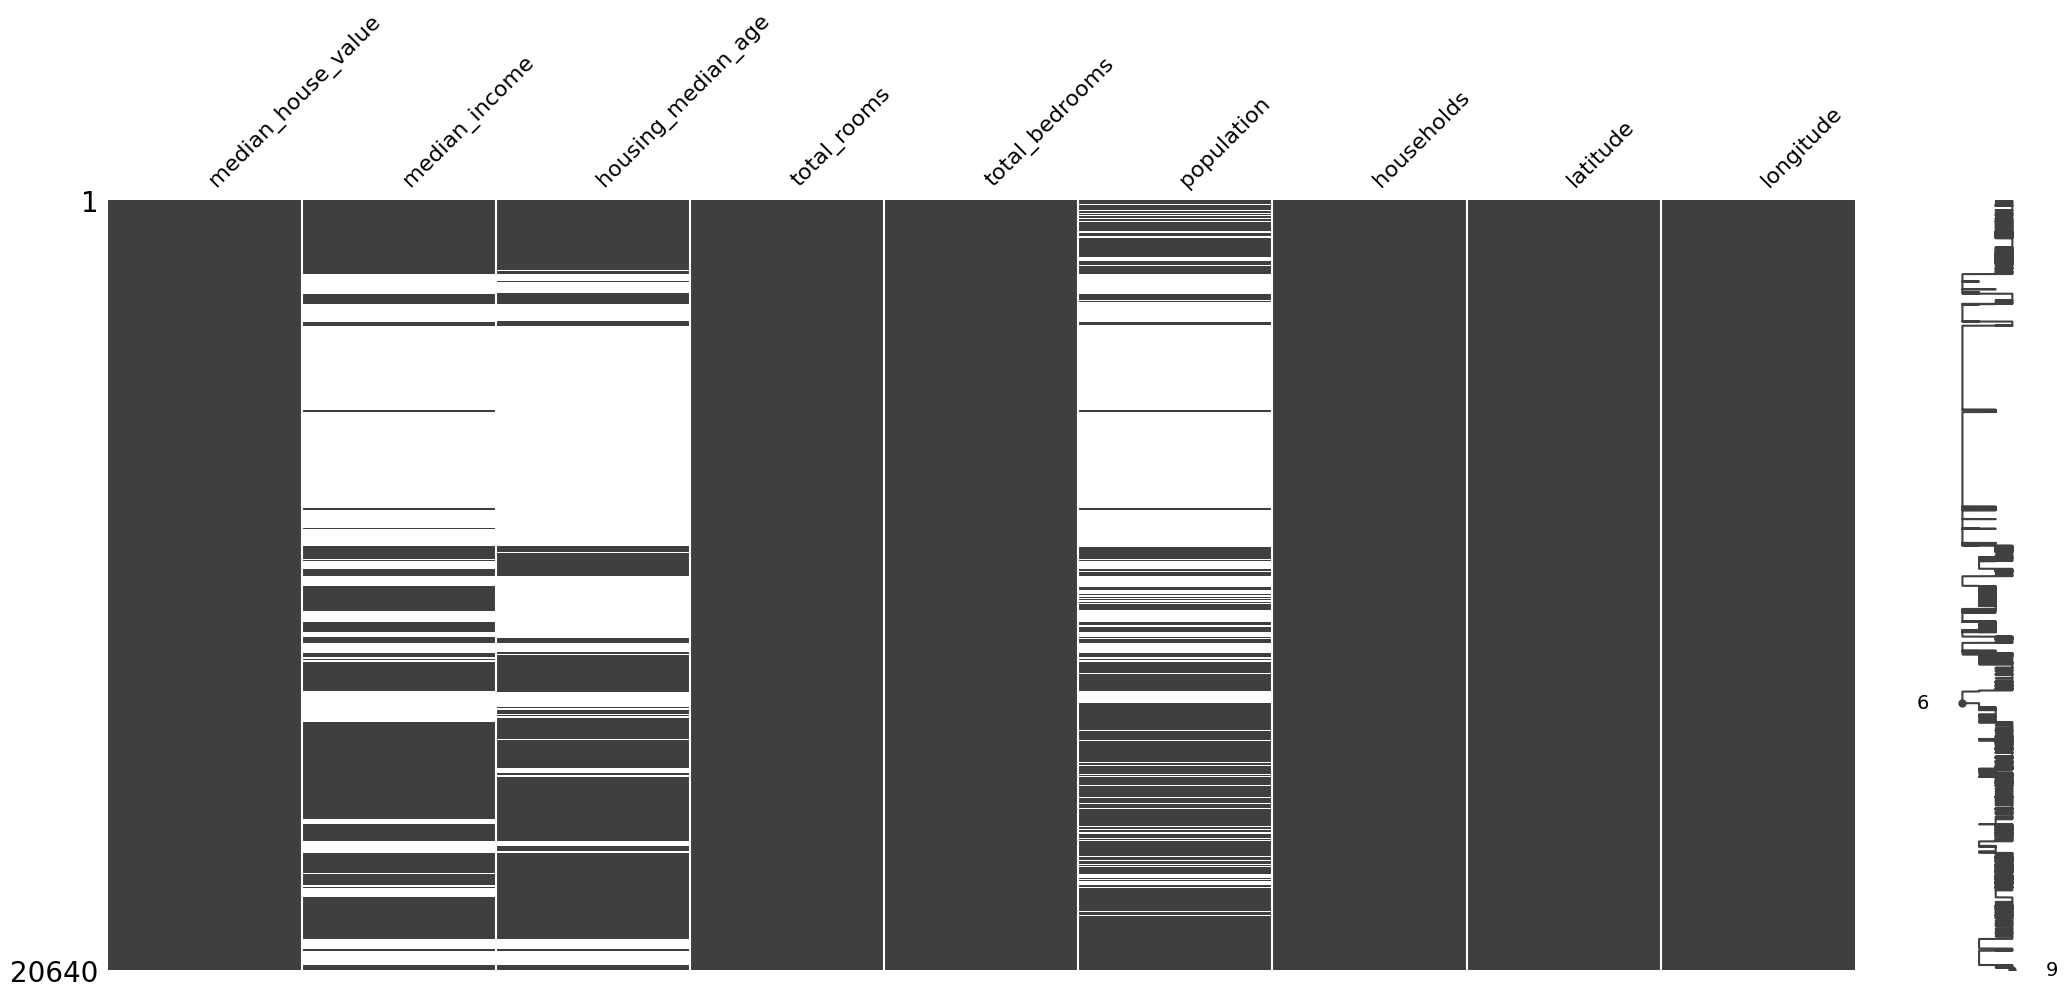

In [ ]:
msno.matrix(houses)

<Axes: >

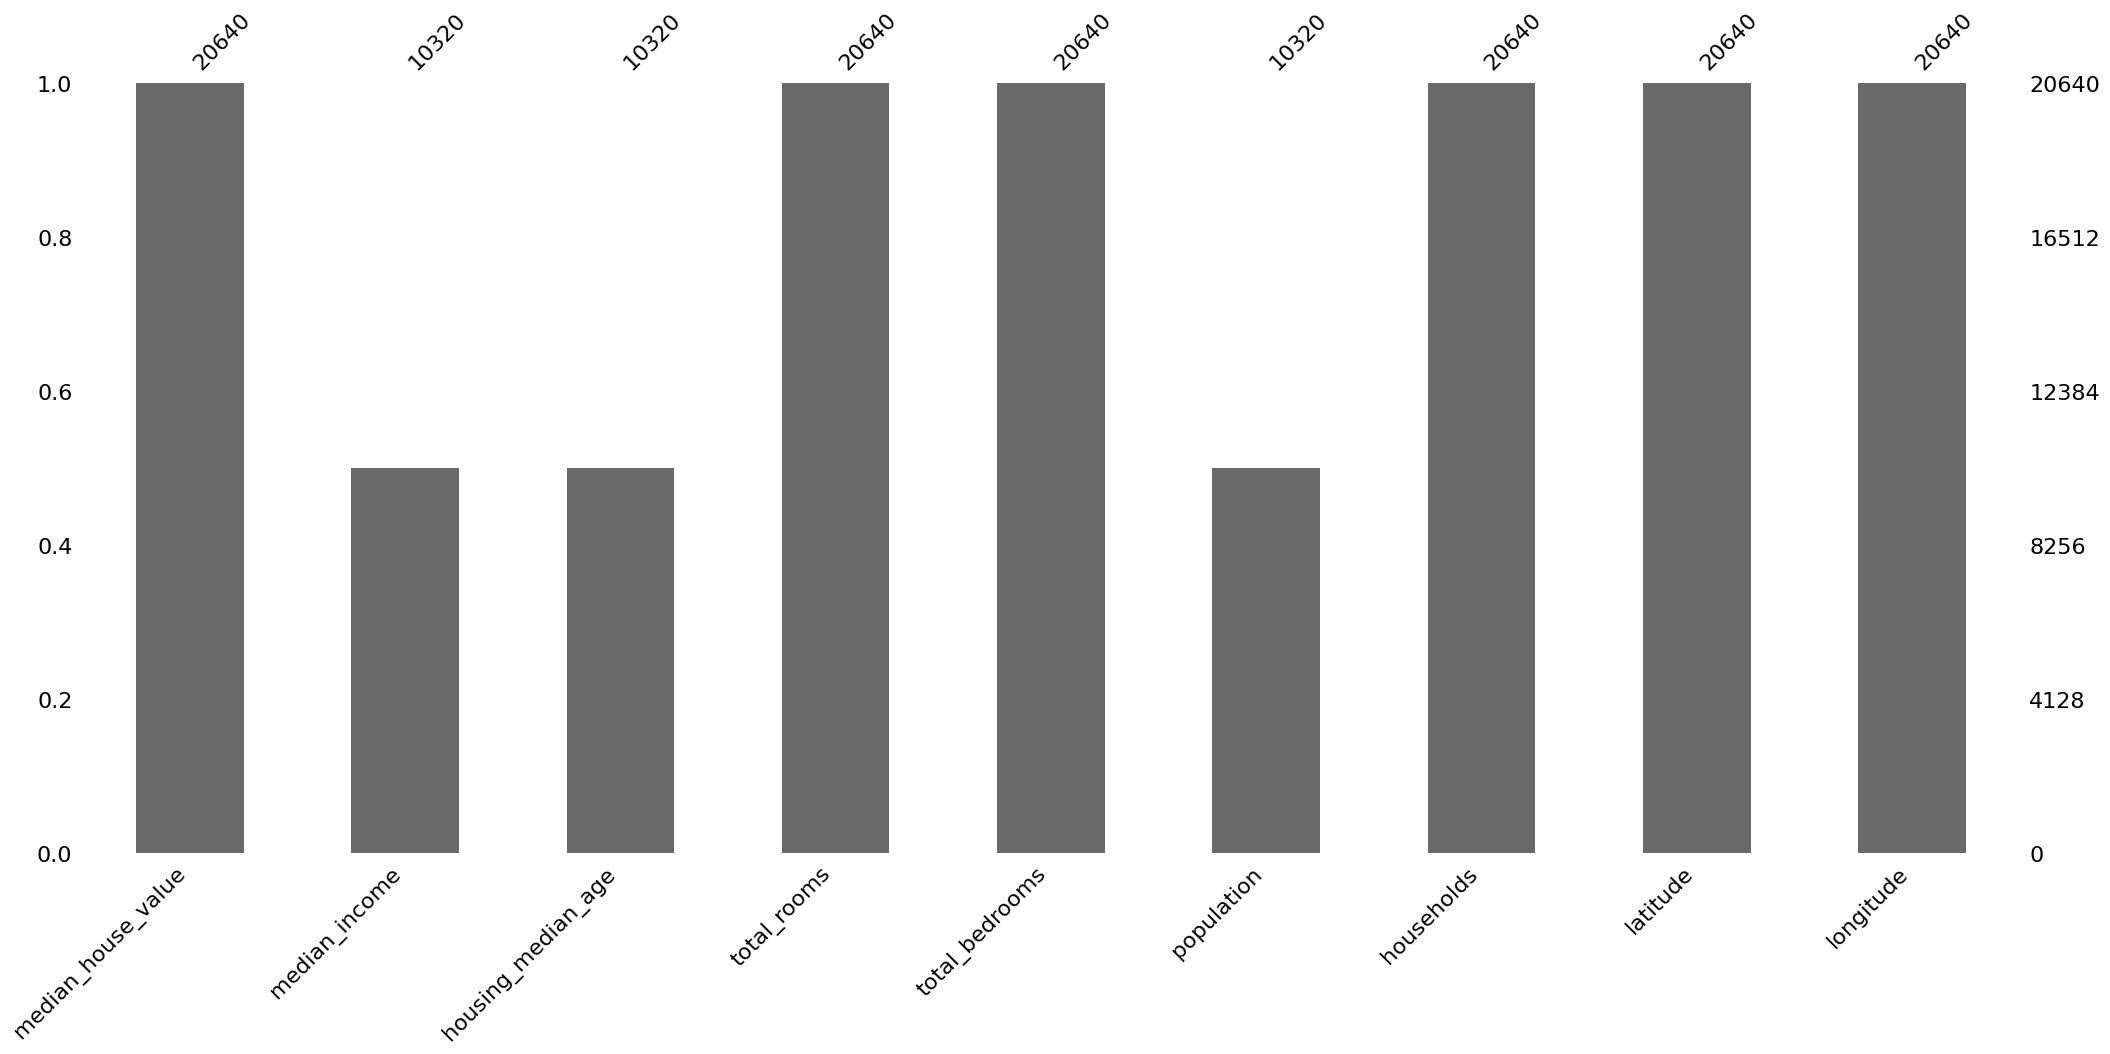

In [ ]:
msno.bar(houses)

###**1. Data Understanding:**<br>
Before analysising the data, there is an empty header in the first row of the data. In the beginning  houses.drop('Unnamed: 0', axis=1) has been applied to remove the empty header. A few functions are applied to perform ad hoc Exploratory Data Analysis (EDA) to have an initial analysis of the dataset provided. According to the statistic provided by houses.info(), There are 9 columns in total that represent median_house_value, median_income, housing_median_age, total_rooms, total_bedrooms, population, households, latitude, and longitude. Some of the columns have 10320 rows, while some have 20640 rows. The data type of all columns are float64. Information such as mean, standard deviation, and percentiles are provided by houses.describe() function. For example, for median_income, it has mean of 3.940372, standard deviation of 1.915848, maximum of 15.000100, minimum of 0.499900, 25th Percentile (Q1) of 2.603300, 50th Percentile (Q2) of 3.601950, and 75th Percentile (Q3) of 4.835600. The houses.isnull().sum() function suggests all the median_income, housing_median_age, and population columns have 10320 missing value. ((houses.isnull().sum() / len(houses)) * 100) displays that all the median_income, housing_median_age, and population columns have 50% missing value. msno.matrix(df) is applied to visualise the missingness of data in each columns. All median_income, housing_median_age, and population columns has missing values.

It is noticable that median_income, housing_median_age, and population columns have significant percentage of missing values, and therefore imputation is needed. Compared with housing_median_age and population, median_income may be considered imputable as it is more important for housing analysis, and its missing values can significantly impact the results.

##**2. KNN Imputation**

In [ ]:
# KNN imputation for columns with missing data
houses1 = pd.read_csv('https://raw.githubusercontent.com/PaoloMissier/CSC3831-2021-22/main/IMPUTATION/TARGET-DATASETS/CORRUPTED/HOUSES/houses_0.5_MAR.csv', header=0)
houses1 = houses1.drop('Unnamed: 0', axis=1)
knn_sparse_features = houses1[['median_income', 'housing_median_age', 'population']]
knn_imputer = KNNImputer(n_neighbors=5)
knn_imputed_sparse_features = knn_imputer.fit_transform(knn_sparse_features)
houses1[['median_income', 'housing_median_age', 'population']] = knn_imputed_sparse_features

Total number of residuals: 6812
Total number of residuals greater than or less than 0: 5417, 79.52143276570757% of the total residues
Total number of residuals equal to 0: 1395, 20.478567234292424% of the total residues


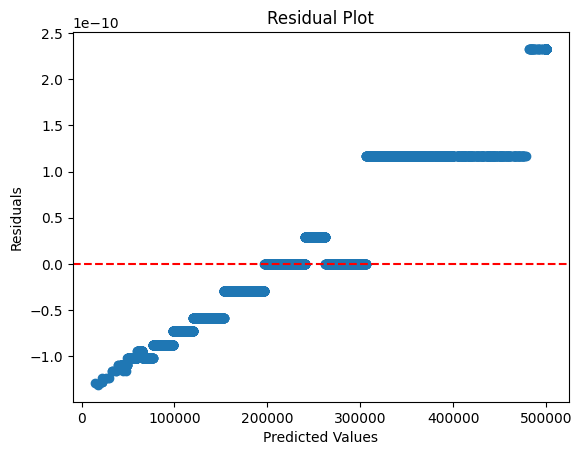

RMSE: 7.12e-21
R^2: 1.0


In [ ]:
# Linear regression for the imputed data
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

X = houses1[houses1['median_house_value'].notnull()].loc[:, houses1.columns].values
y = houses1[houses1['median_house_value'].notnull()]['median_house_value'].values
np.random.seed(42)
X_train, X_test, y_train_true, M1_y_test_true = train_test_split(X, y, test_size=0.33, random_state=42)
M1 = LinearRegression()
M1.fit(X_train, y_train_true)
M1_y_test_pred = M1.predict(X_test)

M1_residuals = M1_y_test_true - M1_y_test_pred
print(f'Total number of residuals: {len(M1_residuals)}')
M1_k=0
M1_j=0
for i in M1_residuals:
  if i<0 or i>0:
    M1_k+=1
for i in M1_residuals:
  if i==0:
    M1_j+=1
print(f'Total number of residuals greater than or less than 0: {M1_k}, {(M1_k/len(M1_residuals))*100}% of the total residues')
print(f'Total number of residuals equal to 0: {M1_j}, {(M1_j/len(M1_residuals))*100}% of the total residues')
plt.scatter(M1_y_test_pred, M1_residuals)
plt.title('Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

print("RMSE: {0:.3}".format(mean_squared_error(M1_y_test_true, M1_y_test_pred)))
print("R^2: {0:.2}".format(r2_score(M1_y_test_true, M1_y_test_pred)))

**2. KNN Imputation**<br>
As mentioned in the first section 'median_income', 'housing_median_age', 'population' columns have missing values. In this part KNN (K-Nearest Neighbors) imputation is applied to fill in missing values in the dataset before using it to train a regression model. Firstly, columns that have missing values are stored into knn_sparse_features, then it is computed with KNNImputer using n_neighbors value of 5. The original DataFrame is then replaced with the imputed values. 'X' is set to a dataframe containing all the the rows where the value of median_house_value is not null. 'y' is set to a dataframe with all records where the value of median_house_value is not null, and the single median_house_value column. After that the data is split into training and testing sets with the train_test_split function. The training set and the testing set contains 67% and 33% of the data respectively. Then, LinearRegression() named M1 is applied to train the data.

**Statistical methods study the performance**<br>
The result of Root Mean Squared Error (RMSE) is 7.12e-21, which is very small. The small value of the RMSE indicates that the model's prediction accuracy on the test data is high. At the same time, the R-squared (R²) value is 1.0, which is the highest possible value. It indicates that the model explains the variance in the target variable well.

**Graphical methods study the performance**<br>
A residue plot is displayed to show the understand the performance of the regression model M1. It is a scatter plot where x-coordinate is the predicted value of each point, y-coordinate is the residue. (y_test_true - y_test_pred) is calculating the residue (errror) of the regression model. There are total of 1395 points (20.5%) that are around at y=0, indicating that the model predictions were perfect for those points. However, it is noticable that there are total of 5417 points (79.5%) that are below or above y=0, which indicates that the model is overestimating or underestimating. The number of points that are underestimated or overestimated are much more than the number of points that are predicted perfectly. This indicates that the model cannot accurately predict certain observations.

##**3. MICE Imputation**

In [ ]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
houses2 = pd.read_csv('https://raw.githubusercontent.com/PaoloMissier/CSC3831-2021-22/main/IMPUTATION/TARGET-DATASETS/CORRUPTED/HOUSES/houses_0.5_MAR.csv', header=0)
houses2 = houses2.drop('Unnamed: 0', axis=1)
mice_sparse_features = houses2[['median_income', 'housing_median_age', 'population']]
mice_imputer = IterativeImputer(missing_values=np.nan, add_indicator=False,
                               random_state=0, n_nearest_features=5,
                               sample_posterior=True)
mice_imputed_sparse_features = mice_imputer.fit_transform(mice_sparse_features)
houses2[['median_income', 'housing_median_age', 'population']] = mice_imputed_sparse_features

Total number of residuals: 6812
Total number of residuals greater than or less than 0: 21, 0.3082795067527892% of the total residues
Total number of residuals equal to 0: 6791, 99.69172049324722% of the total residues


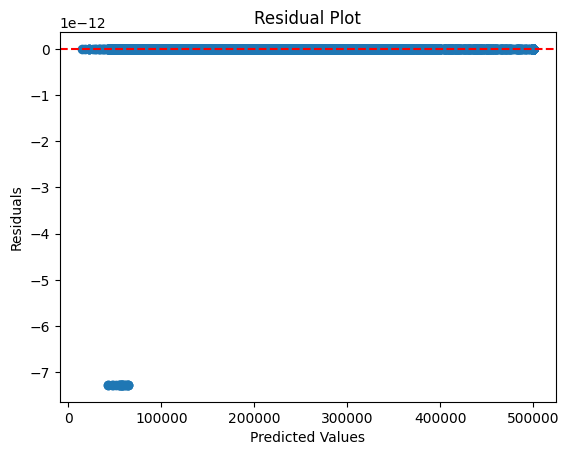

RMSE: 1.63e-25
R^2: 1.0


In [ ]:
# Linear regression for the imputed data
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

X = houses2[houses2['median_house_value'].notnull()].loc[:, houses2.columns].values
y = houses2[houses2['median_house_value'].notnull()]['median_house_value'].values
np.random.seed(42)
X_train, X_test, y_train_true, M2_y_test_true = train_test_split(X, y, test_size=0.33, random_state=42)
M2 = LinearRegression()
M2.fit(X_train, y_train_true)
M2_y_test_pred = M2.predict(X_test)

M2_residuals = M2_y_test_true - M2_y_test_pred
print(f'Total number of residuals: {len(M2_residuals)}')
M2_k=0
M2_j=0
for i in M2_residuals:
  if i<0 or i>0:
    M2_k+=1
for i in M2_residuals:
  if i==0:
    M2_j+=1
print(f'Total number of residuals greater than or less than 0: {M2_k}, {(M2_k/len(M2_residuals))*100}% of the total residues')
print(f'Total number of residuals equal to 0: {M2_j}, {(M2_j/len(M2_residuals))*100}% of the total residues')
plt.scatter(M2_y_test_pred, M2_residuals)
plt.title('Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

print("RMSE: {0:.3}".format(mean_squared_error(M2_y_test_true, M2_y_test_pred)))
print("R^2: {0:.2}".format(r2_score(M2_y_test_true, M2_y_test_pred)))

**3. MICE Imputation**<br>
In this part MICE (Multiple Imputation by Chained Equations) imputation is applied where missing data values in a data set under certain assumptions about the data missingness mechanism are replaced. Firstly, columns that have missing values are stored into mice_sparse_features, then it is computed with IteractiveImputer using missing_values of np.nan and n_nearest_features of 5. The original DataFrame is then replaced with the imputed values. 'X' is set to a dataframe containing all the the rows where the value of median_house_value is not null. 'y' is set to a dataframe with all records where the value of median_house_value is not null, and the single median_house_value column. After that the data is split into training and testing sets with the train_test_split function. The training set and the testing set contains 67% and 33% of the data respectively. Then, LinearRegression() named M2 is applied to train the data.

**Statistical methods study the performance**<br>
The result of Root Mean Squared Error (RMSE) is 1.63e-25, which is very small. The small value of the RMSE indicates that the model's prediction accuracy on the test data is high. At the same time, the R-squared (R²) value is 1.0, which is the highest possible value. It indicates that the model explains the variance in the target variable well.

**Graphical methods study the performance**<br>
A residue plot is displayed to show the understand the performance of the regression model M1. It is a scatter plot where x-coordinate is the predicted value of each point, y-coordinate is the residue. (y_test_true - y_test_pred) is calculating the residue (errror) of the regression model. There are total of 6791 points that are around at y=0, indicating that the model predictions were perfect for those points. There are only 21 points that are below or above y=0, which indicates that the model is overestimating or underestimating. There are 99.7% of points that are predicted perfectly, which is most of the points. This indicates that the model can accurately predict certain observations.

##**4. Comparison**<br>


In [ ]:
print('Performance of M1 regression model:')
print(f'Total number of residuals greater than or less than 0: {M1_k}, {(M1_k/len(M1_residuals))*100}% of the total residues')
print(f'Total number of residuals equal to 0: {M1_j}, {(M1_j/len(M1_residuals))*100}% of the total residues')

Performance of M1 regression model:
Total number of residuals greater than or less than 0: 5417, 79.52143276570757% of the total residues
Total number of residuals equal to 0: 1395, 20.478567234292424% of the total residues


In [ ]:
print('Performance of M2 regression model:')
print(f'Total number of residuals greater than or less than 0: {M2_k}, {(M2_k/len(M2_residuals))*100}% of the total residues')
print(f'Total number of residuals equal to 0: {M2_j}, {(M2_j/len(M2_residuals))*100}% of the total residues')

Performance of M2 regression model:
Total number of residuals greater than or less than 0: 21, 0.3082795067527892% of the total residues
Total number of residuals equal to 0: 6791, 99.69172049324722% of the total residues


In [ ]:
print(f'There are {M1_k-M2_k} less points equal above or below 0 in M2 regression model compared with M1 regression model')
print(f'There are {M2_j-M1_j} more points equal to 0 in M2 regression model compared with M1 regression model')

There are 5396 less points equal above or below 0 in M2 regression model compared with M1 regression model
There are 5396 more points equal to 0 in M2 regression model compared with M1 regression model


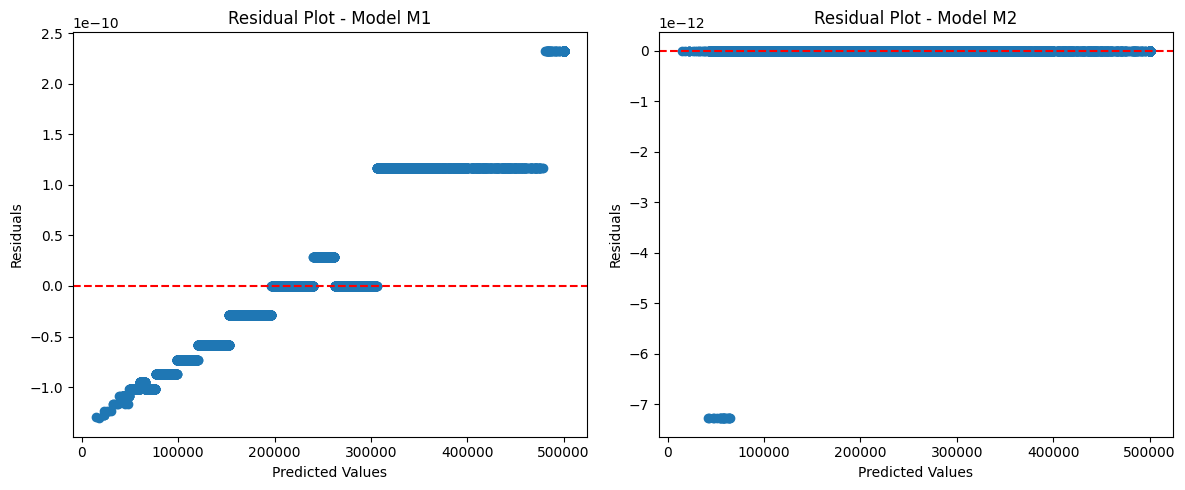

In [ ]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(M1_y_test_pred, M1_residuals)
plt.title('Residual Plot - Model M1')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.axhline(y=0, color='r', linestyle='--')

plt.subplot(1, 2, 2)
plt.scatter(M2_y_test_pred, M2_residuals)
plt.title('Residual Plot - Model M2')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.axhline(y=0, color='r', linestyle='--')

plt.tight_layout()
plt.show()

In [ ]:
print("RMSE of M1: {0:.3}".format(mean_squared_error(M1_y_test_true, M1_y_test_pred)))
print("R^2 of M1: {0:.2}".format(r2_score(M1_y_test_true, M1_y_test_pred)))

RMSE of M1: 7.12e-21
R^2 of M1: 1.0


In [ ]:
print("RMSE of M2: {0:.3}".format(mean_squared_error(M2_y_test_true, M2_y_test_pred)))
print("R^2 of M2: {0:.2}".format(r2_score(M2_y_test_true, M2_y_test_pred)))
print(f'Ratio of RMSE of M2 to M1: {(mean_squared_error(M2_y_test_true, M2_y_test_pred))/(mean_squared_error(M1_y_test_true, M1_y_test_pred))}')

RMSE of M2: 1.63e-25
R^2 of M2: 1.0
Ratio of RMSE of M2 to M1: 2.291568698126404e-05


**4. Comparison**<br>
For accurate and fair comparison, same regression model is used in M1 and M2<br>
**Graphical comparison between M1 and M2**<br>
In regression model M1 with KNN imputation, there are total of 1395 points (20.5%) that are around at y=0, indicating that the model predictions were perfect for those points. However, it is noticable that there are total of 5417 points (79.5%) that are below or above y=0, which indicates that the model is overestimating or underestimating.In regression model M2 with MICE imputation, there are total of 6791 points (99.7%) that are around at y=0, indicating that the model predictions were perfect for those points. There are only 21 points (0.3%) that are below or above y=0, which indicates that the model is overestimating or underestimating.

There are 5396 less points equal above or below 0 in M2 regression model compared with M1 regression model, and 5396 more points equal to 0 in M2 regression model compared with M1 regression model. It indicates that there are more points that are predicted accurately in M2 comparing with M1, and therefore suggests that MICE imputation can produce more accurate prediction for missing value than KNN imputation.

**Statistical comparison between M1 and M2**<br>
For regression model M1 with KNN prediction, the Root Mean Squared Error (RMSE) is 7.12e-21, and the R-squared (R²) value is 1.0. For the regression model M2 with MICE imputation, the Root Mean Squared Error (RMSE) is 1.63e-25, and the R-squared (R²) value is 1.0. The Root Mean Squared Error (RMSE) of M2 is 2.291568698126404e-05 times smaller than the one of M1, indicating that the RMSE of M2 is closer to 0 comparing with M1. The closer the number to 0, the more accurate the prediction the model is, therefore it suggests that MICE imputation can produce more accurate prediction for missing value than KNN imputation.

Both the statistical and graphical method suggest that the regression model M2 with MICE imputation has a better peformance when predicting missing values than regression model M1 with KNN imputation. KNN imputation only uses the observed values of the k-nearest neighbors to estimate missing values. On the other hand, MICE imputation will iteratively improve the imputed values through a sequence or chain of regression models rather than only perform one regression.

I would prefer using MICE imputation rather than KNN imputation in this situation. One of the reason is that the data seems to be Missing At Random (MAR). From the graph generated by msno.matrix(houses), the pattern from the graph shows that the missingness of data are random. Apart from the graph, the smaller value of Root Mean Squared Error (RMSE) of M2 with MICE imputation also suggests that it performs better. Having a better prediction for missing values enable better analysis afterwards.